## Observations and Insights
Duplicate observed and removed
Bar Chart is still in progress
Male Mice & Female Mice popoulation is relatively at par though Male Mice numbers are slightly high
Box & Whisker plot shows data do not contain many outliers (one point). Infibinol group has higher volume of Tumor.
Correlation between factors in weight and Volume of Tumor is high in Campomulin group



In [34]:
%matplotlib inline

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Merged_dataset=pd.merge(study_results,mouse_metadata, how="left", on="Mouse ID")
Merged_dataset.head()
 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [36]:
# Checking the number of mice in the DataFrame.
len(Merged_dataset["Mouse ID"].unique())


249

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseid=Merged_dataset.loc[Merged_dataset.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouseid

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_data=Merged_dataset[Merged_dataset['Mouse ID'].isin(duplicate_mouseid)==False]
filtered_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [39]:
# Checking the number of mice in the clean DataFrame.
len(filtered_data["Mouse ID"].unique())

248

## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_group=filtered_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median_group=filtered_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance_group=filtered_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_group=filtered_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem_group=filtered_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_table_group=pd.DataFrame({
    "Mean Tumor" :mean_group,
       "Median Tumor" :median_group,
    "Var Tumor": variance_group,
    "Std Tumor": std_group,
    "SEM Tumor": sem_group,
    
})
summary_table_group
# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean Tumor,Median Tumor,Var Tumor,Std Tumor,SEM Tumor
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.
# use of .agg ['statistical analysis'] & groupby together
summary_table_group_single=filtered_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])
summary_table_group_single

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [42]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
Bar_plot_group=filtered_data.groupby(["Drug Regimen","Timepoint"])["Mouse ID"].agg(["count"])
Bar_plot_group

count
Drug Regimen Timepoint       
Capomulin    0             25
             5             25
             10            25
             15            24
             20            23
...                       ...
Zoniferol    25            16
             30            15
             35            14
             40            14
             45            14

[100 rows x 1 columns]

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

## Pie Plots

<function matplotlib.pyplot.show(*args, **kw)>

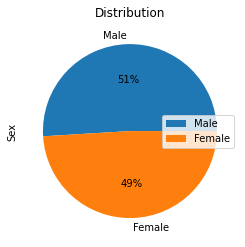

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#filtered_data['Sex'].value_counts()
counts = filtered_data['Sex'].value_counts()
counts
counts.plot(kind='pie', autopct='%1.0f%%',title="Distribution")
# filtered_data['Sex'].value_counts().plot(kind='pie', autopct='%1.2f%%',title="Distribution")

plt.legend(loc='right');
plt.show


<ipython-input-81-f18caa25be7c>:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',


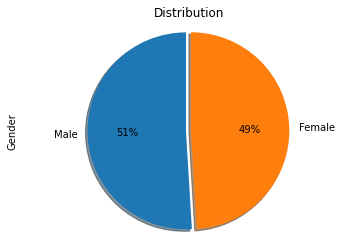

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = filtered_data['Sex'].value_counts()
counts

labels = 'Male', 'Female'
sizes = [counts]
explode = (0, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.ylabel("Gender")

plt.title("Distribution")


plt.show()

## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

max_tumor = filtered_data.groupby(['Mouse ID'])["Timepoint"].max()
max_tumor = max_tumor.reset_index()
max_tumor

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [124]:
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
merg_data = max_tumor.merge(filtered_data,on=['Mouse ID','Timepoint'],how="left")
tumor_vol_data = []

for treatment in treatments:
    vol_tumor = merg_data.loc[merg_data['Drug Regimen'] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(vol_tumor) 

    quartiles = vol_tumor.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outliers = vol_tumor.loc[(vol_tumor<lower_bound) | (vol_tumor>upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


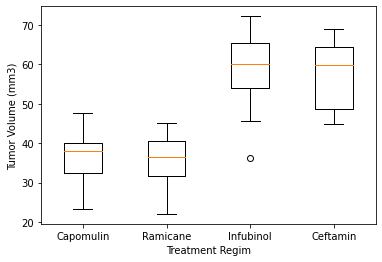

In [126]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = treatments)
plt.xlabel('Treatment Regim')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

In [161]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomul_df = filtered_data.loc[filtered_data["Drug Regimen"]  == "Capomulin"]
capomul_df.head()
capomul_df['Mouse ID'].value_counts()

b742    10
t565    10
s710    10
y793    10
v923    10
j119    10
u364    10
s185    10
r944    10
i557    10
g316    10
i738    10
g288    10
b128    10
m957    10
x401    10
l509    10
w914    10
m601    10
l897    10
r554    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

In [162]:
#select Mouse
mouse_select = capomul_df.loc[capomul_df['Mouse ID'] == 'r554']
mouse_select

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
227,r554,0,45.000000,0,Capomulin,Female,8,17
433,r554,5,45.781746,1,Capomulin,Female,8,17
498,r554,10,39.005494,2,Capomulin,Female,8,17
808,r554,15,35.463758,2,Capomulin,Female,8,17
940,r554,20,36.015589,2,Capomulin,Female,8,17
1243,r554,25,33.893345,3,Capomulin,Female,8,17
1340,r554,30,32.680655,3,Capomulin,Female,8,17
1534,r554,35,33.069337,3,Capomulin,Female,8,17
1734,r554,40,31.804841,3,Capomulin,Female,8,17
1788,r554,45,32.377357,3,Capomulin,Female,8,17


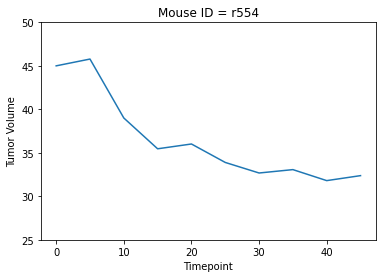

In [163]:
#Line plot time point versus tumor volume for a mouse treated with Capomulin
x_axis = mouse_select['Timepoint']
y_axis = mouse_select['Tumor Volume (mm3)']

plt.plot(x_axis , y_axis)
plt.ylim((25,50))
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title ("Mouse ID = r554")
plt.show()

<ipython-input-172-406bb5234a85>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  capomul_mouse = capomul_df.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].agg('mean')


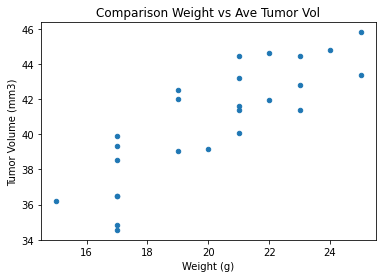

In [172]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


capomul_mouse = capomul_df.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].agg('mean')
capomul_mouse.head()

capomul_mouse.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)');



plt.title('Comparison Weight vs Ave Tumor Vol')

plt.show()

## Correlation and Regression

In [181]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
capomul_mouse = capomul_df.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].agg('mean')
Tumor_Volume = capomul_mouse.iloc[:,0]
Mouse_Weight = capomul_mouse.iloc[:,1]
correlation = st.pearsonr(Tumor_Volume, Mouse_Weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")


(slope, intercept, rvalue, pvalue, stderr) = linregress(capomul_mouse['Weight (g)'], capomul_mouse['Tumor Volume (mm3)'])
regress_values = capomul_mouse['Weight (g)'] * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The equation of the line fitted through the data is: {line_eq}")


The correlation between both factors is 0.84


<ipython-input-181-30bb7f1d34ac>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  capomul_mouse = capomul_df.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].agg('mean')


NameError: name 'linregress' is not defined